# Generate simple random example data

In [1]:
import numpy as np
import itertools
from collections import Counter
import matplotlib.pyplot as plt
from mda import mda,draw_triangle
np.random.seed(12345)

#Number of genes
ndim=100
#Number of cells in each group
ncell=200
#Number of read counts per cell
nread=10000
#Biological variation strength
sigma=1
#Number of groups
ngroup=3
#Distances between other cell groups and reference cell group
dists=np.array([[0,0.2],[0.5,0]])
assert dists.shape==(ngroup-1,ngroup-1)
#Color of each group (row) in RGB format (column)
colors=np.eye(3)


In [2]:
#Random vector to distinguish cell groups
vecs=np.random.randn(ngroup-1,ndim)
#Expression level difference
lvs=dists@vecs
#Prepend reference cell group
lvs=np.r_[np.zeros_like(lvs[[0]]),lvs]
#Add base expression levels
lvs=lvs+np.random.randn(ndim)

In [3]:
#Simluate expression levels with biological variations
d=np.array([(np.random.randn(ncell,ndim)*sigma+x).T for x in lvs])
#Convert to proportion
d=np.exp(d)
d=(d.transpose(1,0,2)/d.sum(axis=1)).transpose(1,2,0)
assert d.shape==(ngroup,ncell,ndim)

In [4]:
#Convert to read count
d2=[[np.random.choice(np.arange(ndim),size=nread,p=x) for x in y] for y in d]
d2=[[np.array(list(Counter(x).items())) for x in y] for y in d2]
d3=np.zeros((ngroup,ndim,ncell),dtype=int)
for xi,xj in itertools.product(range(ngroup),range(ncell)):
	d3[xi,d2[xi][xj][:,0],xj]=d2[xi][xj][:,1]

In [5]:
#Convert to mda input
d3=d3.transpose(1,0,2).reshape(ndim,ngroup*ncell)
dgroup=np.repeat(np.arange(ngroup).reshape(-1,1),ncell,axis=1).ravel()

# Perform MDA dimension reduction

In [6]:
dloc,dprob=mda(d3,dgroup)

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


# Scatter plot of cells projected onto 2-dimensional MDA

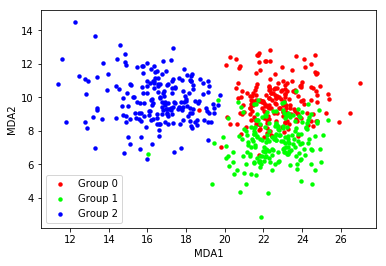

In [7]:
for xi in range(ngroup):
	plt.scatter(*dloc[dgroup==xi].T,label='Group {}'.format(xi),s=20,lw=0,color=colors[xi]);
plt.legend();
plt.xlabel('MDA1')
plt.ylabel('MDA2');
plt.show()

# Triangle plot of cell group overlaps through classification training error

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


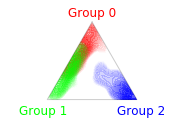

In [8]:
f=draw_triangle(dprob,dgroup,['Group {}'.format(x) for x in range(ngroup)],colors=colors)